In [ ]:
pip install numpy matplotlib scikit-image opencv-python pandas 

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 985.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/12.9 MB 1.0 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.9 MB 1.0 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.9 MB 907.1 kB/s

In [10]:
pip install imagecodecs

   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/28.9 MB ? eta -:--:--
    --------------------------------------- 0.5/28.9 MB 1.3 MB/s eta 0:00:22
   - -------------------------------------- 1.0/28.9 MB 1.9 MB/s eta 0:00:15
   -- ------------------------------------- 1.8/28.9 MB 2.1 MB/s eta 0:00:13
   --- ------------------------------------ 2.6/28.9 MB 2.4 MB/s eta 0:00:11
   ---- ----------------------------------- 3.1/28.9 MB 2.5 MB/s eta 0:00:11
   ---- ----------------------------------- 3.1/28.9 MB 2.5 MB/s eta 0:00:11
   ---- ----------------------------------- 3.1/28.9 MB 2.5 MB/s eta 0:00:11
   ---- ----------------------------------- 3.1/28.9 MB 2.5 MB/s eta 0:00:11
   ---- --------------------------

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
from skimage.metrics import mean_squared_error, structural_similarity

In [12]:
#load data- define path to images
google_img_path = 'satlite_gap/satlite_gap/Google_Map_Tiles(0).tif'
bing_img_path = 'satlite_gap/satlite_gap/Bing_Map_Tiles(0).tif'
mapbox_img_path = 'satlite_gap/satlite_gap/MapBox_Map_Tiles(0).tif'
yandex_img_path = 'satlite_gap/satlite_gap/Yandex_Map_Tiles(0).tif'

In [13]:
#load the images - google as refrence style 
reference_image_bgr = cv2.imread(google_img_path)
bing_image_bgr = cv2.imread(bing_img_path)
mapbox_image_bgr = cv2.imread(mapbox_img_path)
yandex_image_bgr = cv2.imread(yandex_img_path)

#convert from BGR to RGB
reference_image = cv2.cvtColor(reference_image_bgr, cv2.COLOR_BGR2RGB)
bing_image = cv2.cvtColor(bing_image_bgr, cv2.COLOR_BGR2RGB)
mapbox_image = cv2.cvtColor(mapbox_image_bgr, cv2.COLOR_BGR2RGB)
yandex_image = cv2.cvtColor(yandex_image_bgr, cv2.COLOR_BGR2RGB)


In [14]:
images_to_process = {
    "Bing": bing_image,
    "MapBox": mapbox_image,
    "Yandex": yandex_image
}

In [15]:
#plots the RGB histograms for a given image
def plot_histograms(image, title):
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(10, 5))
    plt.title(f'Color Histograms {title}')
    for i, color in enumerate(colors):
        histogram, bin_edges = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.legend(colors)
    plt.grid(True)
    plt.show()

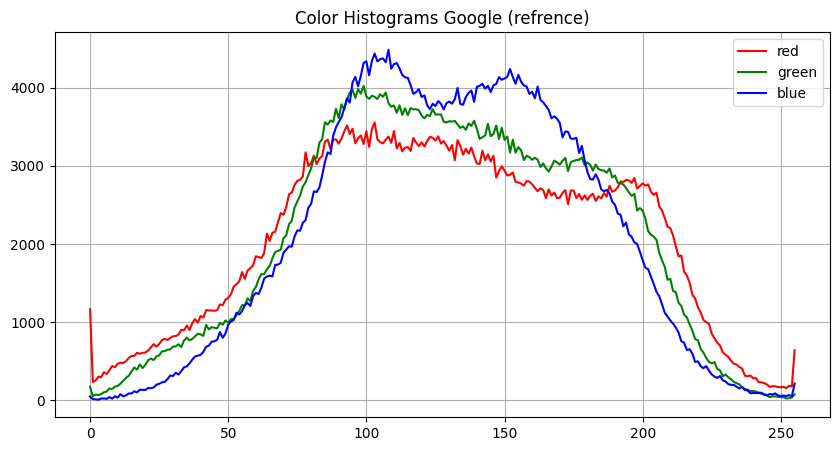

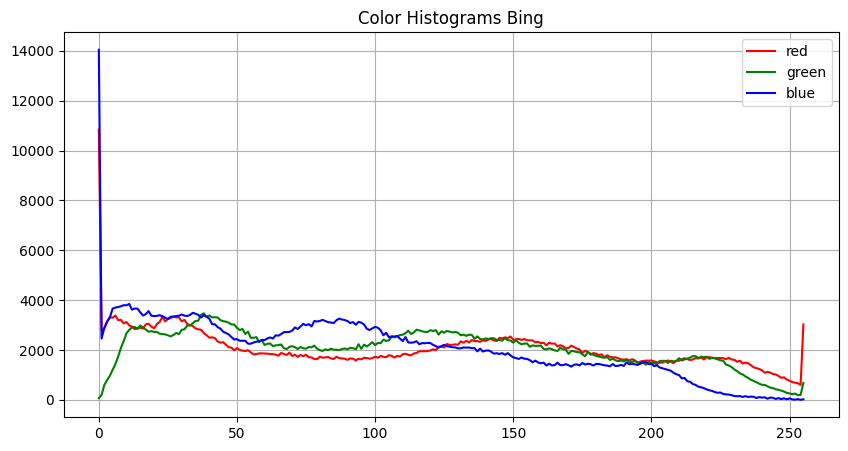

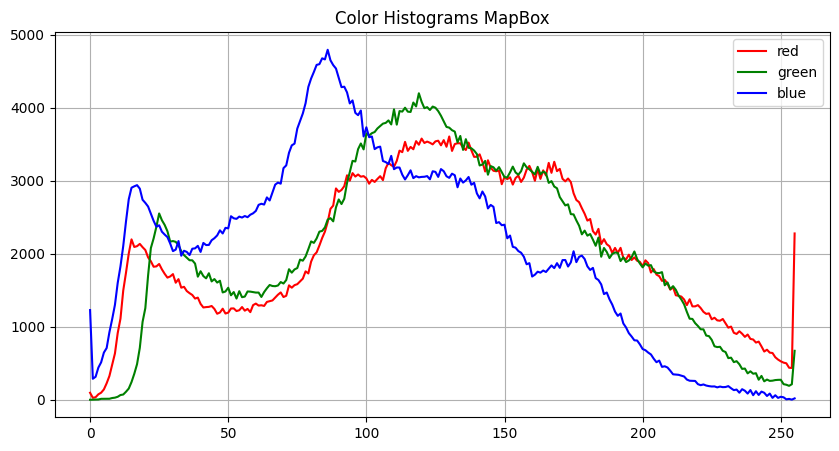

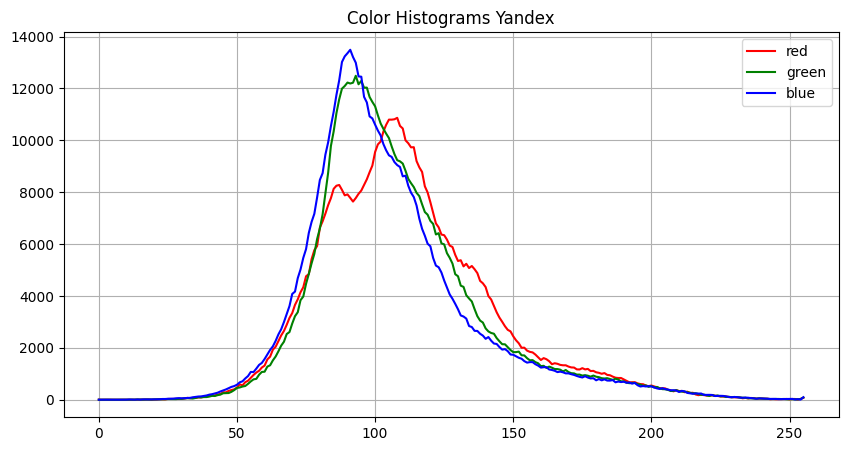

In [18]:
#original image histogram
plot_histograms(reference_image, "Google (refrence)")
for name, img in images_to_process.items():
    plot_histograms(img, name)

In [19]:
#applying histogram matching 
harmonized_images = {}
for name, source_image in images_to_process.items():
    matched_image = match_histograms(
        image=source_image,
        reference=reference_image,
        channel_axis=-1
    )
    harmonized_images[name] = matched_image.astype(np.uint8)


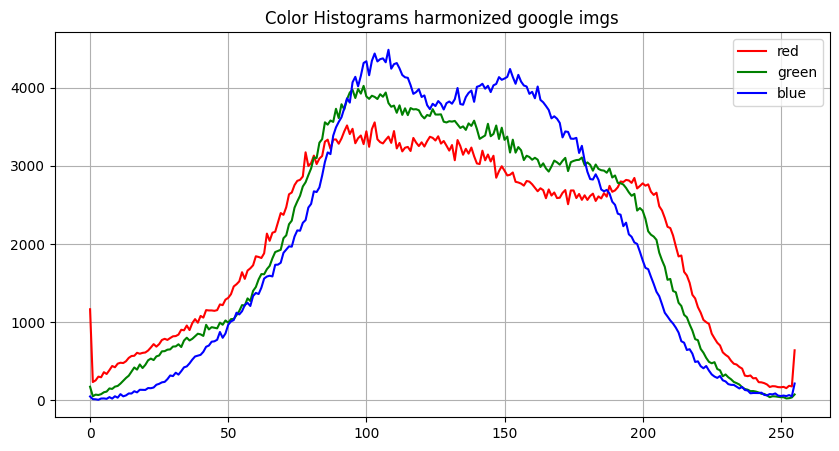

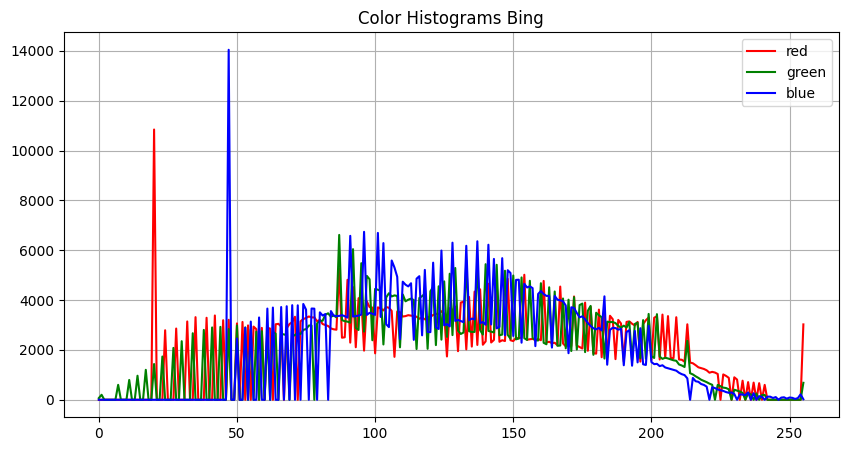

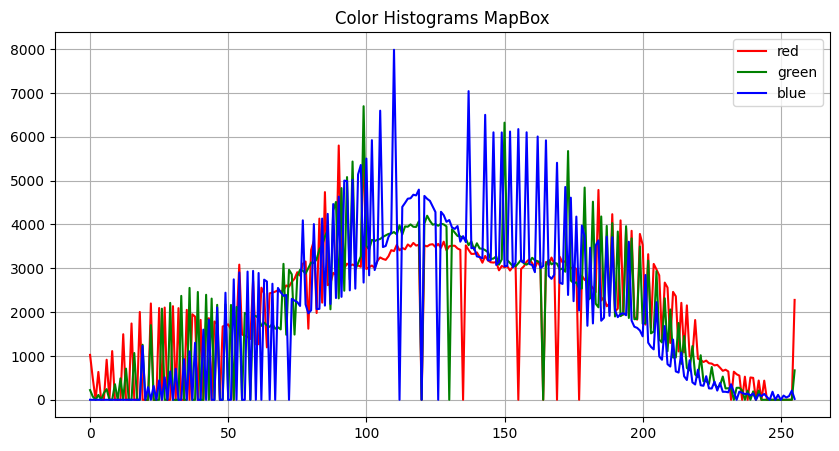

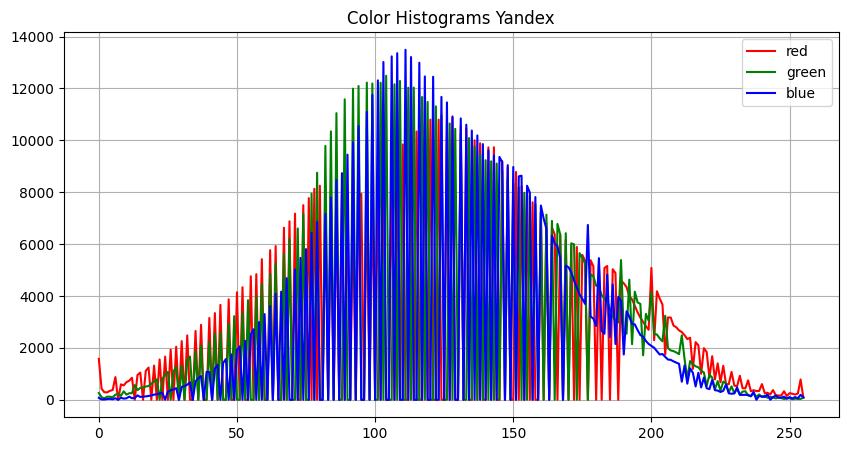

In [26]:
plot_histograms(reference_image, "harmonized google imgs")
for name, img in harmonized_images.items():
    plot_histograms(img, name)

In [22]:
#evaluating similarity to refrence 

for name, original_img in images_to_process.items():
    harmonized_img = harmonized_images[name]
    target_shape = (reference_image.shape[1], reference_image.shape[0])

    original_resized = cv2.resize(original_img, target_shape)
    harmonized_resized = cv2.resize(harmonized_img, target_shape)
    
    # Before Harmonization
    mse_before = mean_squared_error(reference_image, original_resized)
    ssim_before = structural_similarity(reference_image, original_resized, channel_axis=-1, data_range=255)

    # After Harmonization
    mse_after = mean_squared_error(reference_image, harmonized_resized)
    ssim_after = structural_similarity(reference_image, harmonized_resized, channel_axis=-1, data_range=255)
    
    #result
    print(f"BEFORE - MSE: {mse_before:.2f}, SSIM: {ssim_before:.4f}")
    print(f"AFTER  - MSE: {mse_after:.2f}, SSIM: {ssim_after:.4f}")




BEFORE - MSE: 5107.04, SSIM: 0.1193
AFTER  - MSE: 2855.97, SSIM: 0.1450
BEFORE - MSE: 3796.00, SSIM: 0.1916
AFTER  - MSE: 3002.40, SSIM: 0.1997
BEFORE - MSE: 3447.33, SSIM: 0.0714
AFTER  - MSE: 4118.45, SSIM: 0.0444


In [23]:
import os 
output_dir = 'harmonization_results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [24]:
for name, img_rgb in harmonized_images.items():
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'{output_dir}/harmonized_{name}.png', img_bgr)

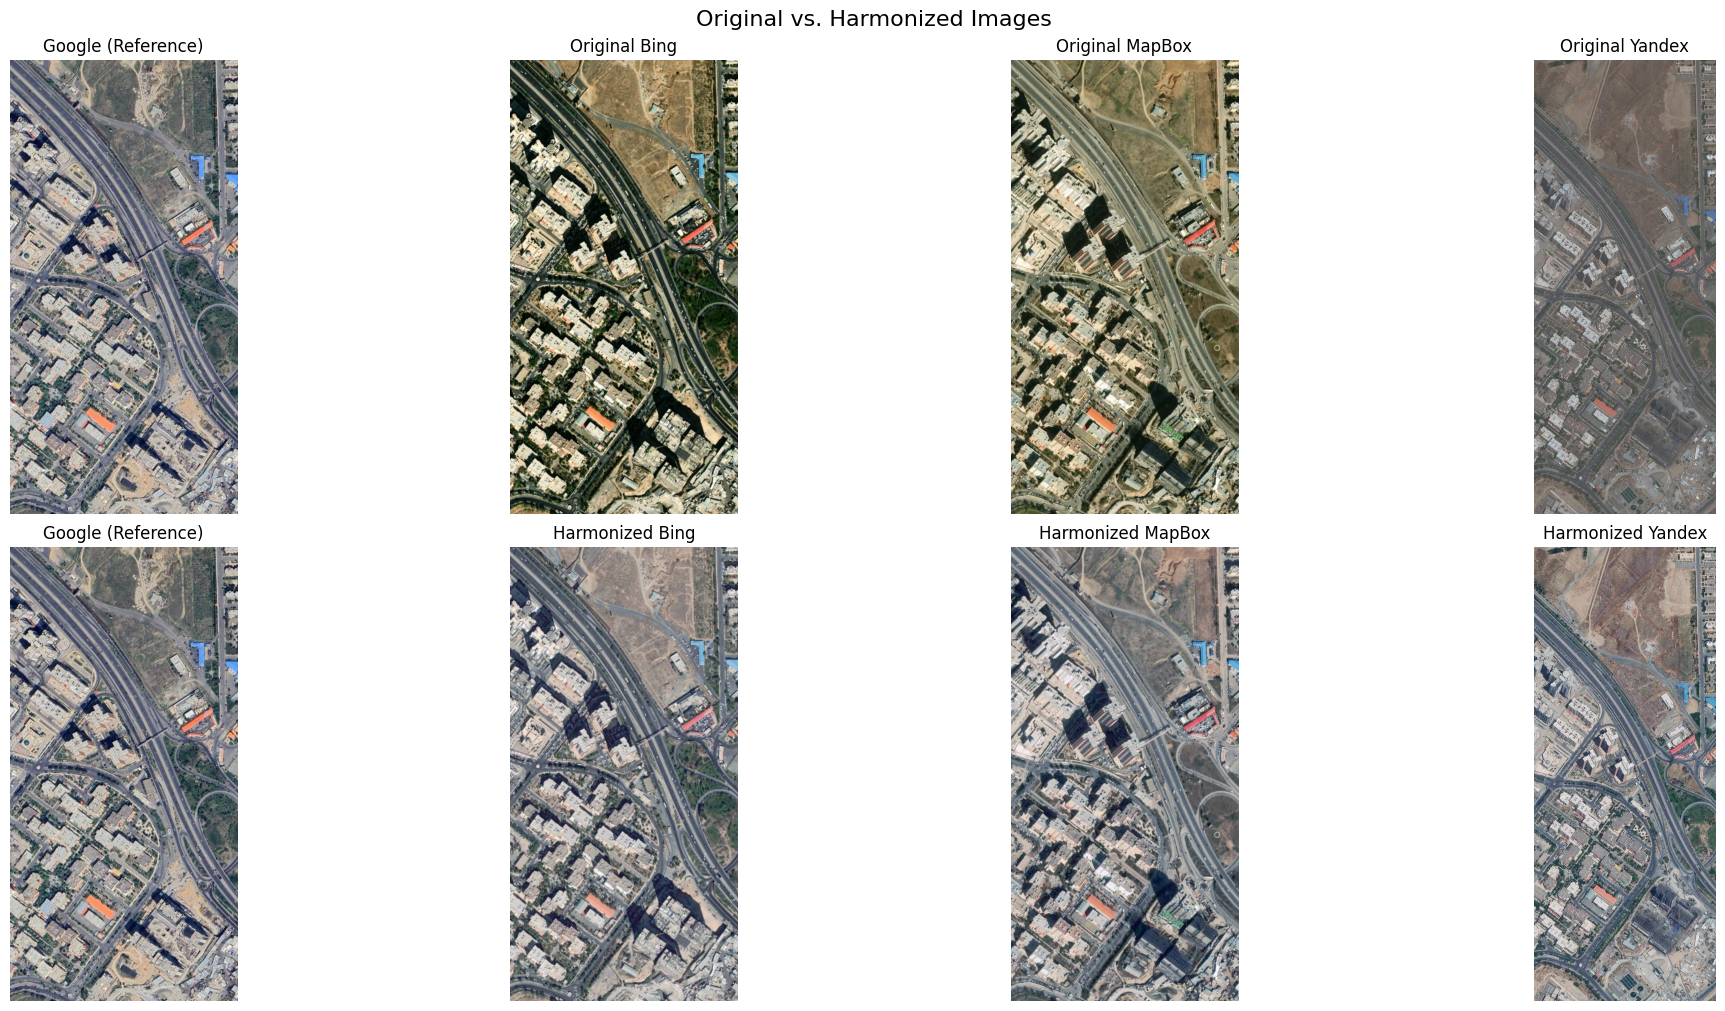

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), constrained_layout=True)
fig.suptitle('Original vs. Harmonized Images', fontsize=16)

axes[0, 0].imshow(reference_image); axes[0, 0].set_title('Google (Reference)')
axes[0, 1].imshow(images_to_process['Bing']); axes[0, 1].set_title('Original Bing')
axes[0, 2].imshow(images_to_process['MapBox']); axes[0, 2].set_title('Original MapBox')
axes[0, 3].imshow(images_to_process['Yandex']); axes[0, 3].set_title('Original Yandex')

axes[1, 0].imshow(reference_image); axes[1, 0].set_title('Google (Reference)')
axes[1, 1].imshow(harmonized_images['Bing']); axes[1, 1].set_title('Harmonized Bing')
axes[1, 2].imshow(harmonized_images['MapBox']); axes[1, 2].set_title('Harmonized MapBox')
axes[1, 3].imshow(harmonized_images['Yandex']); axes[1, 3].set_title('Harmonized Yandex')

for ax in axes.flat:
    ax.axis('off')

plt.show()